In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [351]:
dataframe = pd.read_csv('classification_2.csv')

In [352]:
dataframe.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [353]:
dataframe.nunique()

39                   73
 State-gov            9
 77516            21647
 Bachelors           16
 13                  16
 Never-married        7
 Adm-clerical        15
 Not-in-family        6
 White                5
 Male                 2
 2174               119
 0                   92
 40                  94
 United-States       42
 <=50K                2
dtype: int64

In [354]:
# as there were spaces in the cloumn names we had to remove the spaces form the column names
dataframe.columns = dataframe.columns.str.strip()

In [355]:
dataframe = dataframe.drop(['State-gov', 'Bachelors','Adm-clerical', 'Not-in-family', 'White', 'United-States', 'Male'], axis=1)

In [356]:
new_columns = {'<=50K':'y'}
dataframe.rename(columns=new_columns, inplace=True)

In [357]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 8 columns):
39               32560 non-null int64
77516            32560 non-null int64
13               32560 non-null int64
Never-married    32560 non-null object
2174             32560 non-null int64
0                32560 non-null int64
40               32560 non-null int64
y                32560 non-null object
dtypes: int64(6), object(2)
memory usage: 2.0+ MB


In [358]:
dataframe.y = dataframe.y.str.strip()

In [359]:
(dataframe.isna()).sum()

39               0
77516            0
13               0
Never-married    0
2174             0
0                0
40               0
y                0
dtype: int64

In [360]:
dataframe.head()

,39,77516,13,Never-married,2174,0,40,y
0,50,83311,13,Married-civ-spouse,0,0,13,<=50K
1,38,215646,9,Divorced,0,0,40,<=50K
2,53,234721,7,Married-civ-spouse,0,0,40,<=50K
3,28,338409,13,Married-civ-spouse,0,0,40,<=50K
4,37,284582,14,Married-civ-spouse,0,0,40,<=50K


In [361]:
dataframe = pd.concat((dataframe, pd.get_dummies(dataframe['Never-married'])),1)
column=['Never-married']
dataframe = dataframe.drop(column,axis=1)

In [362]:
dataframe.head()

,39,77516,13,2174,0,40,y,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,50,83311,13,0,0,13,<=50K,0,0,1,0,0,0,0
1,38,215646,9,0,0,40,<=50K,1,0,0,0,0,0,0
2,53,234721,7,0,0,40,<=50K,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,<=50K,0,0,1,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,1,0,0,0,0


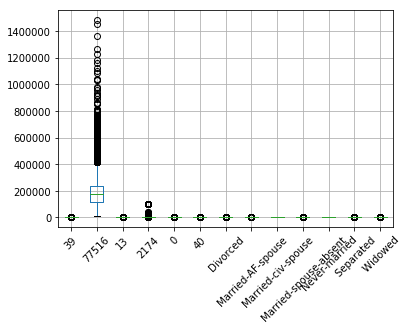

In [363]:
dataframe.boxplot(rot=45)

In [364]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
39                        32560 non-null int64
77516                     32560 non-null int64
13                        32560 non-null int64
2174                      32560 non-null int64
0                         32560 non-null int64
40                        32560 non-null int64
y                         32560 non-null object
 Divorced                 32560 non-null uint8
 Married-AF-spouse        32560 non-null uint8
 Married-civ-spouse       32560 non-null uint8
 Married-spouse-absent    32560 non-null uint8
 Never-married            32560 non-null uint8
 Separated                32560 non-null uint8
 Widowed                  32560 non-null uint8
dtypes: int64(6), object(1), uint8(7)
memory usage: 2.0+ MB


In [365]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [366]:
column = ['77516','2174','13','39','40','0']
for item in column:
    dataframe[item] = dataframe[item].astype(float)
for item in column:
    dataframe[item] = feature_scaling(dataframe,item)

In [367]:
dataframe.head()

,39,77516,13,2174,0,40,y,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.837084,-1.008726,1.134761,-0.145911,-0.21666,-2.222086,<=50K,0,0,1,0,0,0,0
1,-0.042640,0.245043,-0.420020,-0.145911,-0.21666,-0.035429,<=50K,1,0,0,0,0,0,0
2,1.057015,0.425763,-1.197411,-0.145911,-0.21666,-0.035429,<=50K,0,0,1,0,0,0,0
3,-0.775743,1.408124,1.134761,-0.145911,-0.21666,-0.035429,<=50K,0,0,1,0,0,0,0
4,-0.115950,0.898156,1.523457,-0.145911,-0.21666,-0.035429,<=50K,0,0,1,0,0,0,0


In [368]:
def split(dataframe):
    test_data = dataframe.tail(1000).reset_index(drop=True)
    # here we reset index as if the index remain same for accessing by index could be difficult
    return dataframe.head(len(dataframe)-1000).reset_index(), test_data.reset_index()

In [369]:
dataframe, test_data = split(dataframe)

In [370]:
def KNN_Algo(dataframe,test_data):
    # stores the num rows in test data
    test_size = test_data.shape[0]
    # stores the num rows in dataframe
    data_size = dataframe.shape[0]
    # storing original outputs
    original_outputs = test_data.loc[:,'y']
    # storing the outputs of dataframe
    data_outputs = dataframe['y']
    # deleting the outputs from dataframe for computing
    dataframe = dataframe.drop('y',axis=1)
    #deleting the output rows as we'll be compuing on the basis of other rows
    test_data = test_data.drop('y', axis=1)
    predicted_outputs = pd.Series(np.zeros(test_size))
    Eucledian_dist = pd.DataFrame(columns=['dist','y'])
    k = 5
    for counter1 in range(0,test_size):
        for counter2 in range(0,data_size):
            Eucledian_dist.loc[counter2,'dist'] = np.sum(
                np.square(
                    np.subtract(
                        test_data.iloc[counter1,:],dataframe.iloc[counter2,:]
                    )
                )
            )
            Eucledian_dist.loc[counter2,'y'] = data_outputs[counter2]
        Eucledian_dist.dist = np.power(Eucledian_dist.dist,0.5)
        Eucledian_dist = Eucledian_dist.sort_values(by=['dist'])
#         print(Eucledian_dist.head(),'tail', Eucledian_dist.tail(),'uniques', Eucledian_dist.nunique())
        # If the sum of top k elements are x
        if((Eucledian_dist.y[:k]=='>50K').sum() >(k/2)):
            predicted_outputs[counter1] = '>50K'
        else:
            predicted_outputs[counter1] = '<=50K'
        print("iteratoin : {}, predicted: {}".format(counter1,predicted_outputs[counter1]))
    similars = (original_outputs[:]==predicted_outputs[:]).sum()
    accuracy  = similars/test_size
    print(accuracy)

In [ ]:
KNN_Algo(dataframe,test_data)

iteratoin : 0, predicted: <=50K
iteratoin : 1, predicted: <=50K
iteratoin : 2, predicted: <=50K
iteratoin : 3, predicted: <=50K
iteratoin : 4, predicted: <=50K
iteratoin : 5, predicted: <=50K
iteratoin : 6, predicted: >50K
iteratoin : 7, predicted: >50K
iteratoin : 8, predicted: >50K
iteratoin : 9, predicted: >50K
iteratoin : 10, predicted: >50K
iteratoin : 11, predicted: >50K
iteratoin : 12, predicted: <=50K
iteratoin : 13, predicted: <=50K
iteratoin : 14, predicted: <=50K
iteratoin : 15, predicted: <=50K
iteratoin : 16, predicted: <=50K
iteratoin : 17, predicted: <=50K
iteratoin : 18, predicted: <=50K
iteratoin : 19, predicted: <=50K
iteratoin : 20, predicted: <=50K
iteratoin : 21, predicted: >50K
iteratoin : 22, predicted: <=50K
iteratoin : 23, predicted: <=50K
iteratoin : 24, predicted: <=50K
iteratoin : 25, predicted: <=50K
iteratoin : 26, predicted: <=50K
iteratoin : 27, predicted: <=50K
iteratoin : 28, predicted: <=50K
iteratoin : 29, predicted: <=50K
iteratoin : 30, predicted: 